                                                Assignment: EXPLORATORY DATA ANALYSIS

In [ ]:
# Importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading dataset
df = pd.read_csv("C:\\Ankit_Singh\\Data Science\\Sample Data\\Cardiotocographic.csv")
print(df.head())


           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [5]:
# Converting non-numeric values to numerical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [6]:
# Droping rows with NaN after conversion
df.dropna(inplace=True)

In [7]:
# Detecting outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [8]:
# Defining lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [9]:
# Creating a DataFrame to flag outliers
outlier_flags = ((df < lower_bound) | (df > upper_bound))


In [10]:
# Counting outliers per column
print("Outlier counts per column:")
print(outlier_flags.sum())


Outlier counts per column:
LB           10
AC           39
FM          343
UC           13
DL          124
DS          120
DP          284
ASTV         10
MSTV         78
ALTV        317
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [11]:
# Capping/flooring outliers (Winsorization)
df_capped = df.copy()
for col in df.columns:
    df_capped[col] = np.where(df[col] < lower_bound[col], lower_bound[col],
                              np.where(df[col] > upper_bound[col], upper_bound[col], df[col]))


In [12]:
# Comparing original and capped data shapes
print("Original shape:", df.shape)
print("Capped shape:  ", df_capped.shape)


Original shape: (2105, 14)
Capped shape:   (2105, 14)


In [13]:
# Add outlier flag columns for reference
for col in df.columns:
    df_capped[f'{col}_outlier'] = outlier_flags[col].astype(int)


In [14]:
df_capped.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,DL_outlier,DS_outlier,DP_outlier,ASTV_outlier,MSTV_outlier,ALTV_outlier,MLTV_outlier,Width_outlier,Tendency_outlier,NSP_outlier
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,27.5,...,0,0,0,0,0,1,0,0,0,1
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,...,0,0,0,0,0,0,0,0,0,0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,...,0,0,0,0,0,0,0,0,0,0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,...,0,0,0,0,0,0,1,0,0,0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Statistical Summaries
summary = df_capped.describe().T
summary['median'] = df_capped.median()
summary['mode'] = df_capped.mode().iloc[0]
summary['IQR'] = summary['75%'] - summary['25%']
summary['range'] = summary['max'] - summary['min']
summary['var'] = df_capped.var()
summary['skew'] = df_capped.skew()
summary['kurtosis'] = df_capped.kurt()
summary['CV'] = summary['std'] / summary['mean']  # Coefficient of Variation
summary = summary[['mean', 'median', 'mode', 'std', 'var', 'CV', 'min', '25%', '50%', '75%', 'max', 'IQR', 'range', 'skew', 'kurtosis']]

# Displaying summary
pd.set_option("display.float_format", "{:.3f}".format)
print("\nStatistical Summary:")
print(summary.head())




Statistical Summary:
      mean  median    mode   std    var    CV     min     25%     50%     75%  \
LB 133.293 133.000 133.000 9.980 99.594 0.075 105.000 126.000 133.000 140.000   
AC   0.003   0.002   0.000 0.004  0.000 1.223  -0.008   0.000   0.002   0.006   
FM   0.002   0.000   0.000 0.002  0.000 1.584  -0.004   0.000   0.000   0.003   
UC   0.004   0.004   0.000 0.003  0.000 0.690  -0.005   0.002   0.004   0.007   
DL   0.002   0.000   0.000 0.003  0.000 1.512  -0.005   0.000   0.000   0.003   

       max    IQR  range  skew  kurtosis  
LB 161.000 14.000 56.000 0.018    -0.197  
AC   0.014  0.006  0.023 1.057     0.401  
FM   0.006  0.003  0.010 1.129    -0.244  
UC   0.014  0.005  0.019 0.151    -0.451  
DL   0.008  0.003  0.013 1.234     0.335  


In [18]:
# checking for top 3 variables for each metric

top_std = summary['std'].sort_values(ascending=False).head(3).reset_index()
top_skew = summary['skew'].abs().sort_values(ascending=False).head(3).reset_index()
top_kurt = summary['kurtosis'].sort_values(ascending=False).head(3).reset_index()
top_cv = summary['CV'].sort_values(ascending=False).head(3).reset_index()

# Renaming columns jujst for clarity
top_std.columns = ['Feature_std', 'Std_Dev']
top_skew.columns = ['Feature_skew', 'Skewness']
top_kurt.columns = ['Feature_kurtosis', 'Kurtosis']
top_cv.columns = ['Feature_cv', 'Coefficient_of_Variation']

# Combine all top metrics into one DataFrame
combined_top = pd.concat([top_std, top_skew, top_kurt, top_cv], axis=1)

# Display combined table
print("\nTop 3 Features by Standard Deviation, Skewness, Kurtosis, and Coefficient of Variation:")
print(combined_top)



Top 3 Features by Standard Deviation, Skewness, Kurtosis, and Coefficient of Variation:
  Feature_std  Std_Dev      Feature_skew  Skewness  Feature_kurtosis  \
0       Width   39.768  Tendency_outlier    14.415      ASTV_outlier   
1        ASTV   17.636        LB_outlier    14.415  Tendency_outlier   
2        ALTV   10.398     Width_outlier    14.415        LB_outlier   

   Kurtosis        Feature_cv  Coefficient_of_Variation  
0   205.997  Tendency_outlier                    14.478  
1   205.997        LB_outlier                    14.478  
2   205.997      ASTV_outlier                    14.478  


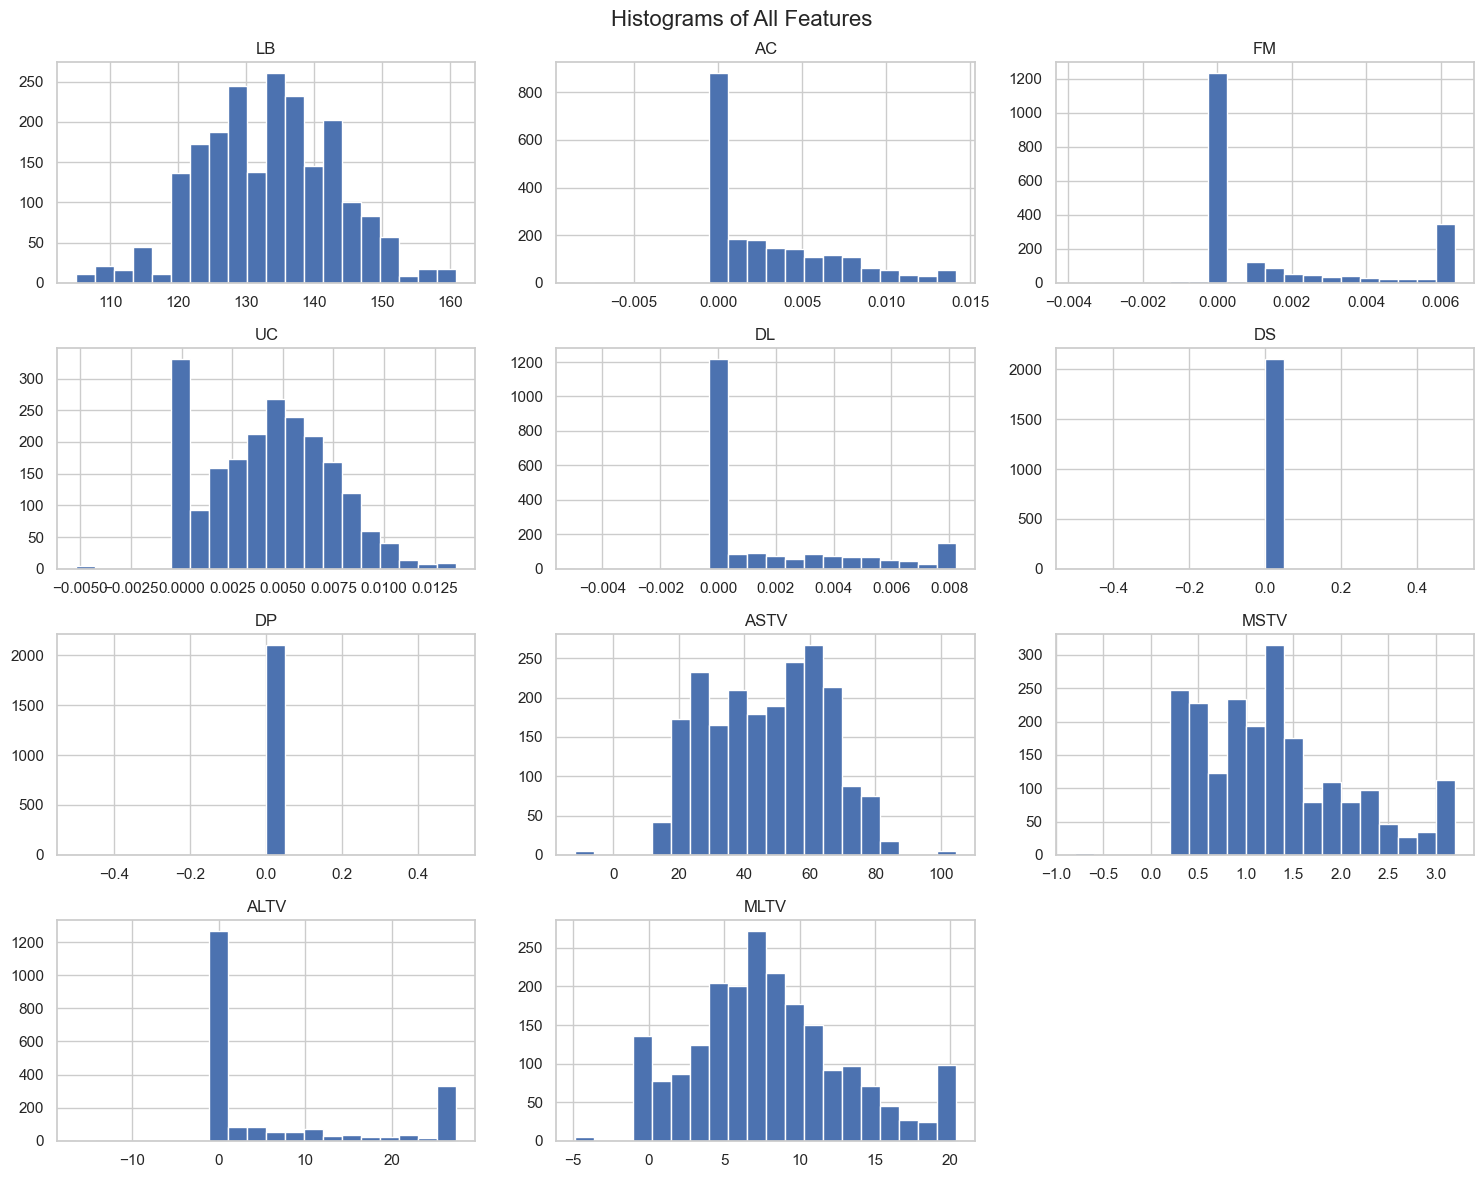

In [19]:
# Data Visualization
sns.set(style="whitegrid")

# Histograms
df_capped.iloc[:, :11].hist(figsize=(15, 12), bins=20)
plt.suptitle("Histograms of All Features", fontsize=16)
plt.tight_layout()
plt.show()


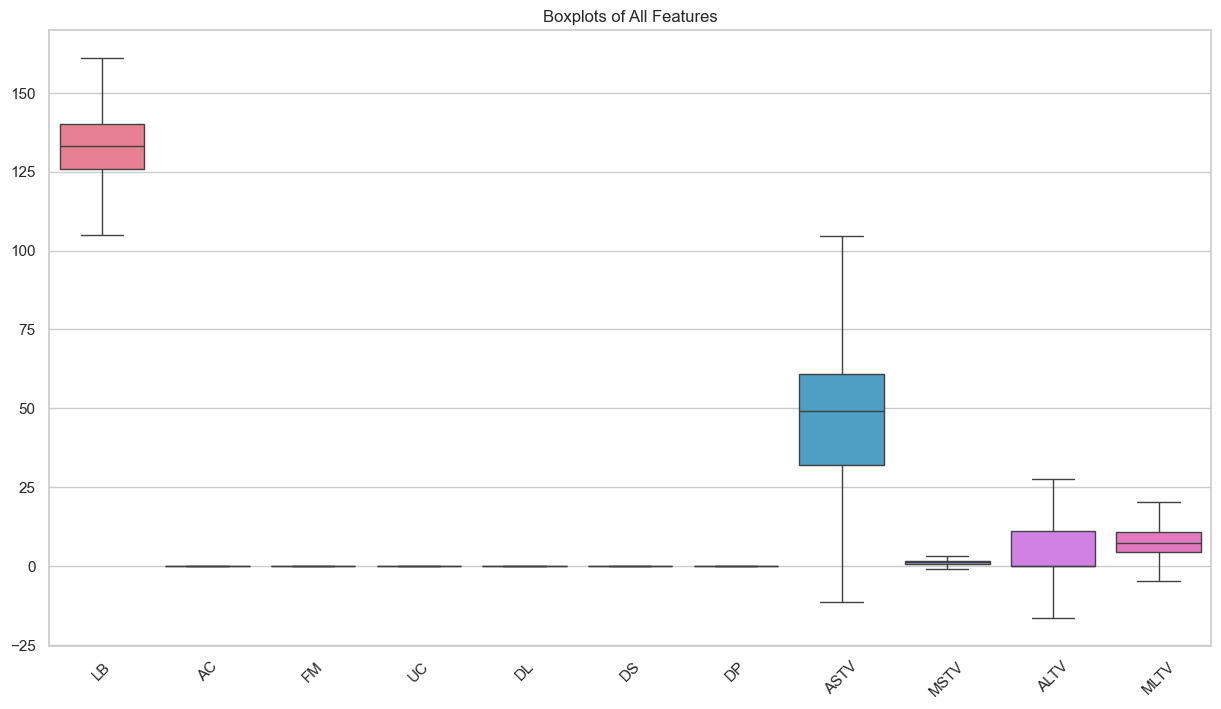

In [20]:
# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_capped.iloc[:, :11])
plt.xticks(rotation=45)
plt.title("Boxplots of All Features")
plt.show()

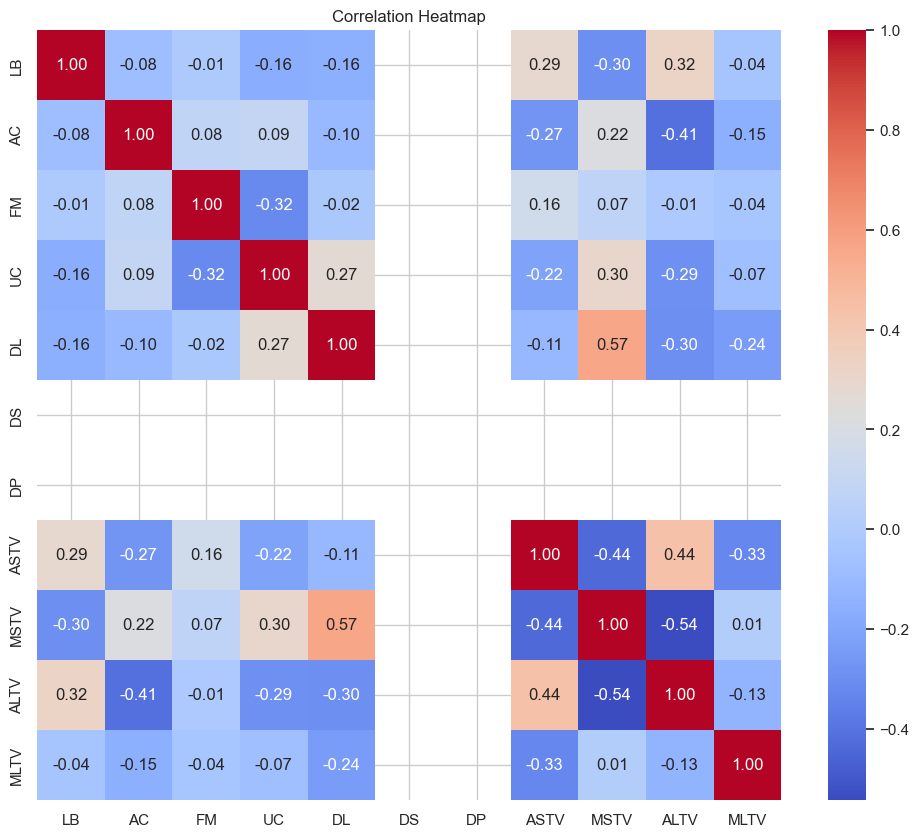

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_capped.iloc[:, :11].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

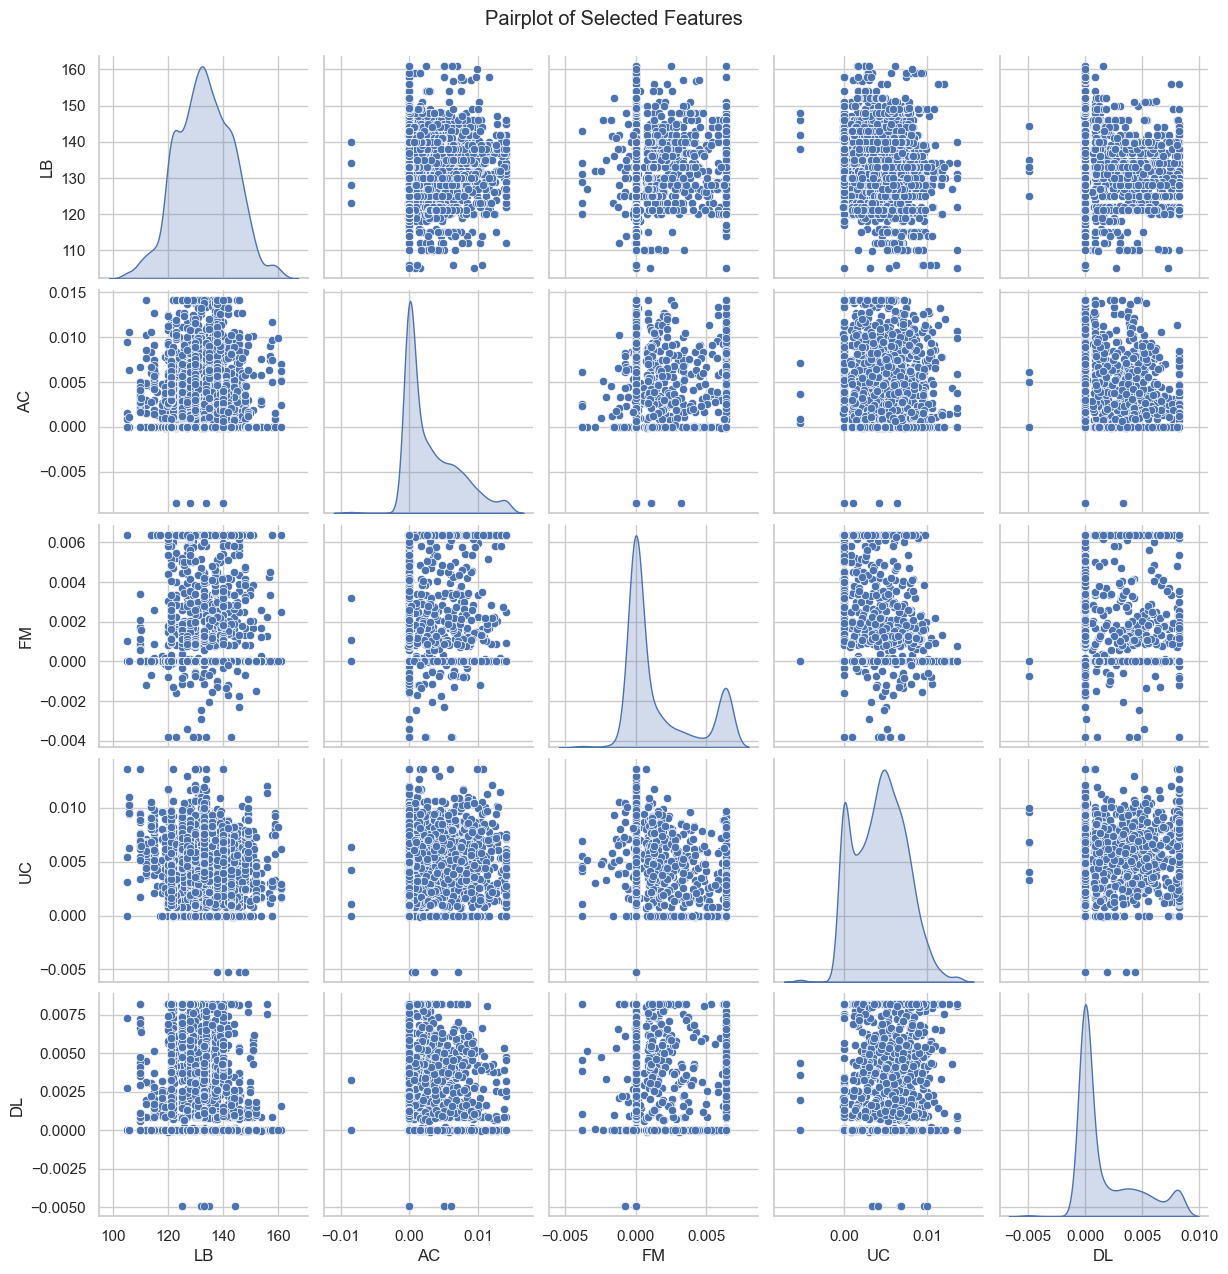

In [22]:
# Pairplot on selected variables
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL']
sns.pairplot(df_capped[selected_cols], diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


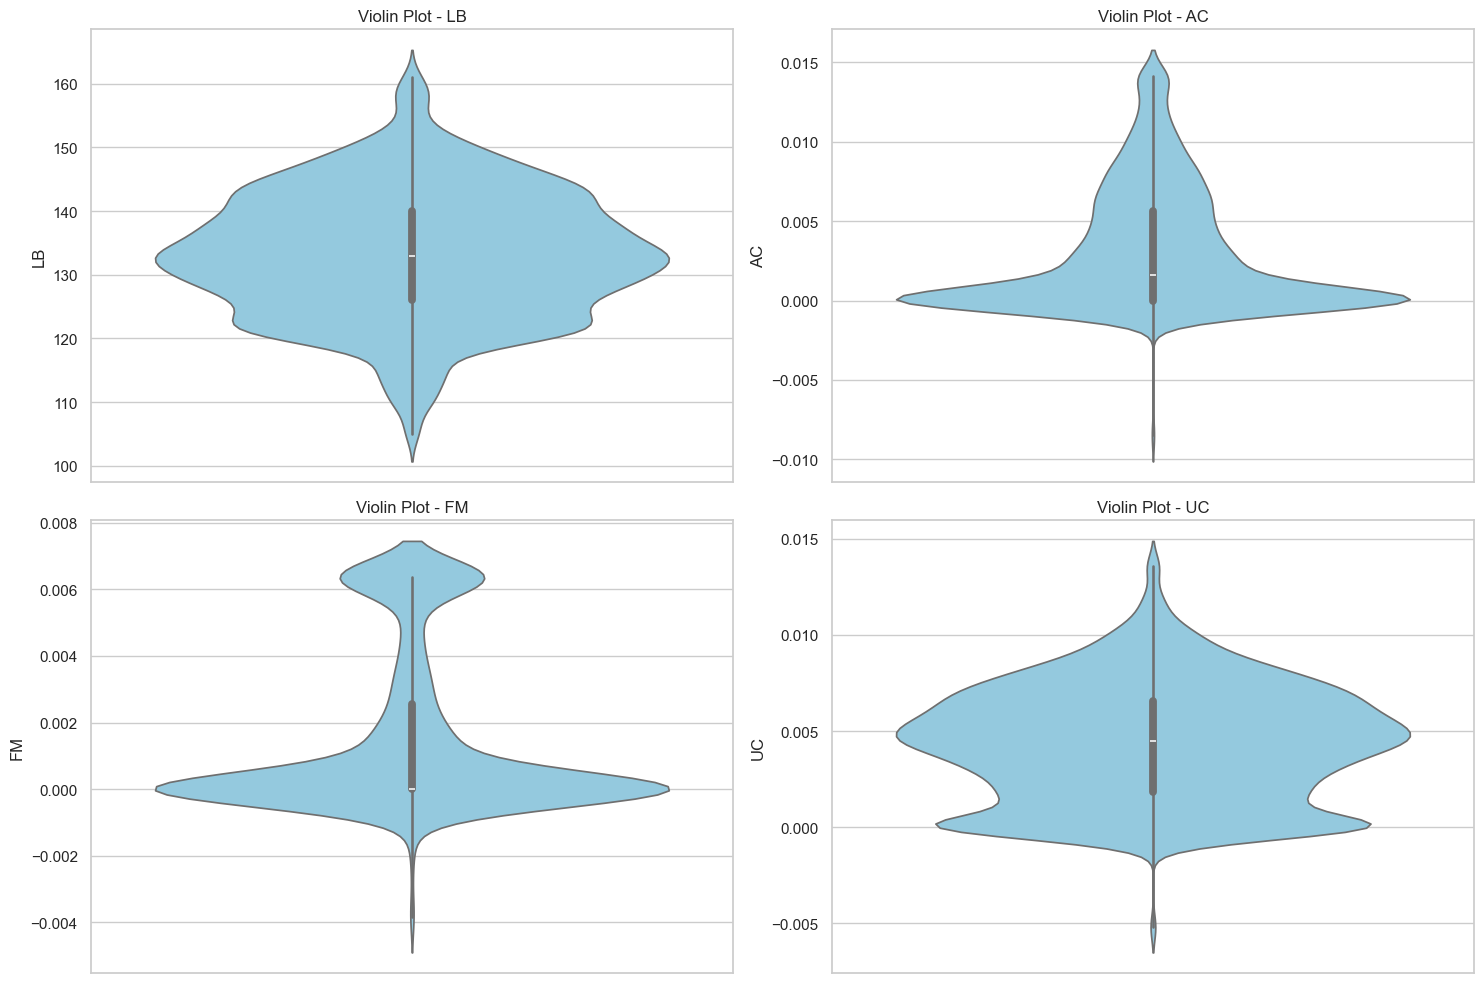

In [23]:
# Violin plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['LB', 'AC', 'FM', 'UC']):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(y=df_capped[col], color="skyblue")
    plt.title(f'Violin Plot - {col}')
plt.tight_layout()
plt.show()

In [24]:
# Pattern Recognition
# Correlation analysis
corr_matrix = df_capped.iloc[:, :11].corr()
strong_corrs = corr_matrix[(corr_matrix > 0.5) & (corr_matrix < 1.0)]
print("\nStrong Positive Correlations (> 0.5):")
print(strong_corrs.dropna(how='all').dropna(axis=1, how='all'))



Strong Positive Correlations (> 0.5):
        DL  MSTV
DL     NaN 0.566
MSTV 0.566   NaN


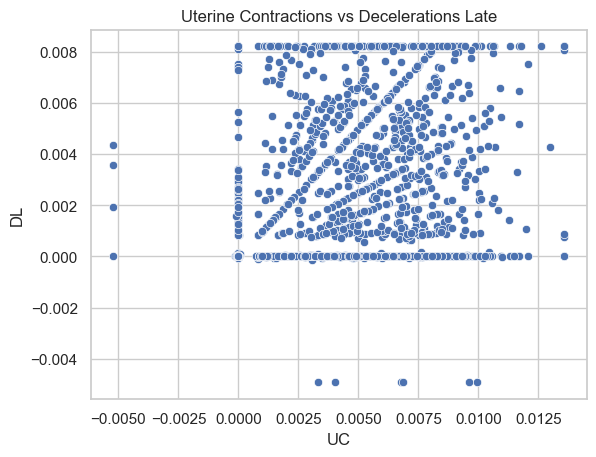

In [25]:
# Scatter example
sns.scatterplot(x='UC', y='DL', data=df_capped)
plt.title("Uterine Contractions vs Decelerations Late")
plt.show()


Conclusion:

Outlier Detection & Treatment:

Identified outliers using IQR.

Performed Winsorization (capping/flooring outliers).

Added binary outlier flags for each variable.

Statistical Summary:

Computed metrics: mean, median, mode, std, IQR, range, variance, skewness, kurtosis, and Coefficient of Variation (CV).

Identified top 3 variables for each metric.

Visualization:

Plotted histograms, boxplots, violin plots, pairplots, and correlation heatmaps.

Scatter plot highlighted the relationship between UC and DL.

Pattern Recognition:

Found one strong positive correlation:

DL and MSTV (r = 0.566)

Key Insights:
Most variable features (high std): Width, ASTV, ALTV

Highest skewness and kurtosis: Detected mainly in outlier flag columns, indicating highly skewed distributions before capping.

Highest relative variability (CV): AC, FM, and DL showed most inconsistency relative to their means.

Outliers were common in FM, ALTV, DP, and NSP before treatment.

Moderate linear relationship detected between DL (Late Decelerations) and MSTV (Mean Short-Term Variability), which might be clinically relevant.

No other strong correlations among features, suggesting relatively independent behavior for most variables.